# Final Project  IST 652

In [70]:
# Project: IST 652 - Data Scripting
# Team: Amanda Norwood
# Purpose : To review NFL data and undersatnd various parameters and their influence 
#         : To review and understand the historical trends
#         : Visualize the interpretations using plots and graphs
# Data Source: https://github.com/nflverse/nfldata/blob/master/DATASETS.md#games 
#             https://www.kaggle.com/code/blueblowfish/nfl-data-analysis/data

## Libraries

In [1]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib import cm
import numpy as np
import os as os
import pprint as pp  #data pretty print
import re
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib.patches as ptc
from decimal import Decimal
import plotly.express as px #plotly express for plotting

## Reading Data

In [72]:
#reading CSVs
games = pd.read_csv('http://www.habitatring.com/games.csv')
nfl_teams = pd.read_csv('nfl_teams.csv')
nfl_allstats = pd.read_csv('nflcombine2.csv')

## Data Previews

In [73]:
nfl_teams.head(2)

,ID,Name,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South


In [74]:
#preview games --> uses 3-letter team abbreviation
#result column will show NaN if the game has not been played yet
games.head(3)

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
0,1999_01_MIN_ATL,1999,REG,1,1999-09-12,Sunday,NaN,MIN,17.0,ATL,...,NaN,00-0003761,00-0002876,Randall Cunningham,Chris Chandler,Dennis Green,Dan Reeves,Gerry Austin,ATL00,Georgia Dome
1,1999_01_KC_CHI,1999,REG,1,1999-09-12,Sunday,NaN,KC,17.0,CHI,...,12.0,00-0006300,00-0010560,Elvis Grbac,Shane Matthews,Gunther Cunningham,Dick Jauron,Phil Luckett,CHI98,Soldier Field
2,1999_01_PIT_CLE,1999,REG,1,1999-09-12,Sunday,NaN,PIT,43.0,CLE,...,12.0,00-0015700,00-0004230,Kordell Stewart,Ty Detmer,Bill Cowher,Chris Palmer,Bob McElwee,CLE00,Cleveland Browns Stadium


In [75]:
#preview nfl_teams --> shows team name, 3-letter abbreviation conference, and division
nfl_teams.head(3)

,ID,Name,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South
2,3,Baltimore Ravens,BAL,AFC,North


In [76]:
#preview nfl_allstats --> shows home/away teams total yards, passyds, rushyds, turnovers
#--> also show's home/away as FULL team name. We will use nfl_teams to pull in 3 letter abbreviation
nfl_allstats.head(3)

,Unnamed: 0,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,...,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year,Winner
0,0,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,98.0,2.0,...,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers,2019,San Francisco 49ers
1,1,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,259.0,1.0,...,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers,2019,San Francisco 49ers
2,2,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,168.0,5.0,...,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers,2019,San Francisco 49ers


## Rename Columns

In [77]:
#preview nfl_allstats column names
allstatscol = list(nfl_allstats.columns.values)
allstatscol

['Unnamed: 0',
 'Unnamed: 5',
 'Opp',
 'Tm',
 'Opp.1',
 '1stD',
 'TotYd',
 'PassY',
 'RushY',
 'TO',
 '1stD.1',
 'TotYd.1',
 'PassY.1',
 'RushY.1',
 'TO.1',
 'Offense',
 'Defense',
 'Sp. Tms',
 'Home_team',
 'Year',
 'Winner']

In [78]:
#renaming nfl_allstats columns so it is easier to understand what it means
nfl_allstats = nfl_allstats.rename(columns={'Home_team':'home_team_stats', 
                                            'Opp':'away_team_stats',
                                            'Unnamed: 0':'ID',
                                            'Unnamed: 5':'W/L',
                                            'Opp.1':'o_rank',
                                            '1stD':'1st_downs',
                                            'TotYd':'totyards',
                                            'PassY':'passyds',
                                            'RushY':'rushyds',
                                            '1stD.1':'o_1st_downs',
                                            'TotYd.1':'o_totyards',
                                            'PassY.1':'o_passyds',
                                            'RushY.1':'o_rushyds',
                                            'TO.1':'o_TO',
                                            'Sp. Tms':'sptmrank',
                                            'Offense':'offenserank',
                                            'Defense':'defenserank'})

In [79]:
#verifying it looks correct
#named away_team_stats and home_team_stats with suffix. _stats so we know the team name is derived from stats table
nfl_allstats.head(1)

,ID,W/L,away_team_stats,Tm,o_rank,1st_downs,totyards,passyds,rushyds,TO,...,o_totyards,o_passyds,o_rushyds,o_TO,offenserank,defenserank,sptmrank,home_team_stats,Year,Winner
0,0,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,98.0,2.0,...,295.0,174.0,121.0,4.0,-7.51,19.12,1.1,San Francisco 49ers,2019,San Francisco 49ers


## Data Cleanup

In [80]:
#creating list of column names to see what we can drop
column_names = list(games.columns.values)
column_names

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'gametime',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'result',
 'total',
 'overtime',
 'old_game_id',
 'gsis',
 'nfl_detail_id',
 'pfr',
 'pff',
 'espn',
 'away_rest',
 'home_rest',
 'away_moneyline',
 'home_moneyline',
 'spread_line',
 'away_spread_odds',
 'home_spread_odds',
 'total_line',
 'under_odds',
 'over_odds',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'away_qb_id',
 'home_qb_id',
 'away_qb_name',
 'home_qb_name',
 'away_coach',
 'home_coach',
 'referee',
 'stadium_id',
 'stadium']

In [81]:
##dropping unnecessary columns in games
games = games.drop(['old_game_id','gametime','away_qb_id','home_qb_id',
              'gsis','nfl_detail_id','pfr','pff','espn','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds',
              'total_line','under_odds','over_odds','referee'],axis=1)

##NaN results means the game has not been played yet - we will drop them foor now
games = games.dropna(subset=['result'])

## Create New Columns for Analysis

In [82]:
##creating boolean column within games data
#this adds a column to games and identify's between 0 and 1
## 0 = indoor
## 1 = outdoor

def indoor_outdoor(x):
    if x == 'outdoors':
        return 1
    else:
        return 0
    
games['indoor_outdoor'] = games['roof'].apply(indoor_outdoor)
##verify the def worked
games[['roof','indoor_outdoor']].head(5)

,roof,indoor_outdoor
0,dome,0
1,outdoors,1
2,outdoors,1
3,outdoors,1
4,dome,0


In [83]:
def WL(x):
    if x >= 1:
        return 'W'
    elif x == 0:
        return 'Tie'
    else:
        return 'L'
    
games['WL'] = games['result'].apply(WL)
##verify the def worked
games[['home_team','home_score','away_team','away_score','result','WL']]

,home_team,home_score,away_team,away_score,result,WL
0,ATL,14.0,MIN,17.0,-3.0,L
1,CHI,20.0,KC,17.0,3.0,W
2,CLE,0.0,PIT,43.0,-43.0,L
3,GB,28.0,OAK,24.0,4.0,W
4,IND,31.0,BUF,14.0,17.0,W
...,...,...,...,...,...,...
6338,PIT,14.0,BAL,16.0,-2.0,L
6339,TEN,22.0,JAX,36.0,-14.0,L
6340,DEN,28.0,KC,34.0,-6.0,L
6341,SEA,24.0,CAR,30.0,-6.0,L


In [84]:
games[['home_team','home_score','away_team','away_score','result','WL']]

,home_team,home_score,away_team,away_score,result,WL
0,ATL,14.0,MIN,17.0,-3.0,L
1,CHI,20.0,KC,17.0,3.0,W
2,CLE,0.0,PIT,43.0,-43.0,L
3,GB,28.0,OAK,24.0,4.0,W
4,IND,31.0,BUF,14.0,17.0,W
...,...,...,...,...,...,...
6338,PIT,14.0,BAL,16.0,-2.0,L
6339,TEN,22.0,JAX,36.0,-14.0,L
6340,DEN,28.0,KC,34.0,-6.0,L
6341,SEA,24.0,CAR,30.0,-6.0,L


In [85]:
games[['season','home_team','home_score','away_team','away_score','result','WL']].query("WL == 'Tie'")

,season,home_team,home_score,away_team,away_score,result,WL
912,2002,PIT,34.0,ATL,34.0,0.0,Tie
2526,2008,CIN,13.0,PHI,13.0,0.0,Tie
3590,2012,SF,24.0,STL,24.0,0.0,Tie
3880,2013,GB,26.0,MIN,26.0,0.0,Tie
4059,2014,CIN,37.0,CAR,37.0,0.0,Tie
4620,2016,ARI,6.0,SEA,6.0,0.0,Tie
4623,2016,CIN,27.0,WAS,27.0,0.0,Tie
5051,2018,CLE,21.0,PIT,21.0,0.0,Tie
5068,2018,GB,29.0,MIN,29.0,0.0,Tie
5326,2019,ARI,27.0,DET,27.0,0.0,Tie


In [86]:
#creating list of column names
column_names = list(games.columns.values)
column_names

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'result',
 'total',
 'overtime',
 'away_rest',
 'home_rest',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'away_qb_name',
 'home_qb_name',
 'away_coach',
 'home_coach',
 'stadium_id',
 'stadium',
 'indoor_outdoor',
 'WL']

## Data Merging

In [87]:
##merging short abbreviation team names

#merging away_team name with the abr
nfl_allstats = pd.merge(nfl_allstats, nfl_teams[['Name','Abbreviation']], left_on='away_team_stats', right_on = 'Name',how='left')
#renaming column as awway_team_br
nfl_allstats = nfl_allstats.rename(columns={'Abbreviation':'away_team_abr'})

#merging home_team name with abr
nfl_allstats = pd.merge(nfl_allstats, nfl_teams[['Name','Abbreviation']], left_on='home_team_stats', right_on = 'Name',how='left')
nfl_allstats = nfl_allstats.rename(columns={'Abbreviation':'home_team_abr'})

nfl_allstats.head(3)

,ID,W/L,away_team_stats,Tm,o_rank,1st_downs,totyards,passyds,rushyds,TO,...,offenserank,defenserank,sptmrank,home_team_stats,Year,Winner,Name_x,away_team_abr,Name_y,home_team_abr
0,0,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,98.0,2.0,...,-7.51,19.12,1.10,San Francisco 49ers,2019,San Francisco 49ers,Tampa Bay Buccaneers,TB,San Francisco 49ers,SF
1,1,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,259.0,1.0,...,27.34,1.14,-6.64,San Francisco 49ers,2019,San Francisco 49ers,Cincinnati Bengals,CIN,San Francisco 49ers,SF
2,2,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,168.0,5.0,...,-3.72,10.20,0.12,San Francisco 49ers,2019,San Francisco 49ers,Pittsburgh Steelers,PIT,San Francisco 49ers,SF


In [88]:
#mergeing games and nfl_allstats
#then removing duplicates based on game_id (unique)
recentgames = games.merge(nfl_allstats,how='inner', left_on=['season','home_team','away_team'], 
                       right_on=['Year','home_team_abr','away_team_abr'])

#this will keep the first unique game_id and then drop the duplicate

recentgames = recentgames.drop_duplicates(subset='game_id', keep="first")

#there are 449 unique games left between 2019 - now
recentgames.describe()

,season,week,away_score,home_score,result,total,overtime,away_rest,home_rest,div_game,...,TO,o_1st_downs,o_totyards,o_passyds,o_rushyds,o_TO,offenserank,defenserank,sptmrank,Year
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,2020.176991,9.261062,22.557522,23.823009,1.265487,46.380531,0.057522,7.530973,7.442478,0.404867,...,1.836283,20.190265,344.878319,230.176991,114.701327,1.763274,2.739093,-1.974889,0.110066,2020.176991
std,0.976260,5.503314,9.899439,9.843773,13.982420,13.938776,0.233096,2.046340,1.959402,0.491410,...,1.059102,5.042093,87.438243,80.285077,51.944083,0.996302,11.670444,11.958963,4.896437,0.976260
min,2019.000000,1.000000,0.000000,0.000000,-43.000000,15.000000,0.000000,4.000000,4.000000,0.000000,...,1.000000,6.000000,105.000000,-6.000000,8.000000,1.000000,-35.440000,-32.930000,-14.140000,2019.000000
25%,2019.000000,4.000000,16.000000,17.000000,-6.000000,36.000000,0.000000,7.000000,7.000000,0.000000,...,1.000000,17.000000,281.750000,173.000000,74.000000,1.000000,-4.440000,-10.535000,-3.335000,2019.000000
50%,2020.000000,9.000000,23.000000,24.000000,1.500000,45.000000,0.000000,7.000000,7.000000,0.000000,...,2.000000,20.000000,349.500000,227.500000,106.000000,1.000000,3.690000,-2.685000,0.155000,2020.000000
75%,2021.000000,14.000000,30.000000,30.000000,10.000000,56.000000,0.000000,7.000000,7.000000,1.000000,...,2.000000,23.000000,402.000000,280.000000,146.000000,2.000000,10.470000,5.255000,3.275000,2021.000000
max,2022.000000,21.000000,51.000000,56.000000,40.000000,94.000000,1.000000,17.000000,15.000000,1.000000,...,7.000000,35.000000,572.000000,461.000000,288.000000,7.000000,40.690000,35.650000,17.390000,2022.000000


## Cleanup of merged data

In [89]:
allcol = list(recentgames.columns.values)
allcol
##dropping unnecssary columns

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'result',
 'total',
 'overtime',
 'away_rest',
 'home_rest',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'away_qb_name',
 'home_qb_name',
 'away_coach',
 'home_coach',
 'stadium_id',
 'stadium',
 'indoor_outdoor',
 'WL',
 'ID',
 'W/L',
 'away_team_stats',
 'Tm',
 'o_rank',
 '1st_downs',
 'totyards',
 'passyds',
 'rushyds',
 'TO',
 'o_1st_downs',
 'o_totyards',
 'o_passyds',
 'o_rushyds',
 'o_TO',
 'offenserank',
 'defenserank',
 'sptmrank',
 'home_team_stats',
 'Year',
 'Winner',
 'Name_x',
 'away_team_abr',
 'Name_y',
 'home_team_abr']

In [90]:
#dropping unnecessary columns
recentgames = recentgames.drop(['Name_x','Name_y','home_team_stats','away_team_stats','away_team_abr','home_team_abr','Tm'],axis=1)

## Stats

In [91]:
##grouping score stats by home_team for games 1999-now
home_team_stats = games.groupby(['home_team']).mean()
##overall home and away score avg
home_team_stats[['home_score','away_score']].mean()

home_score    23.279783
away_score    21.158844
dtype: float64

In [92]:
##creating home QB dataset where their location is Home 1999-present
home_qb = games.query("location == 'Home'")

## subselecting necessary columns

In [93]:
##subselecting necessary columns
home_qb = home_qb[['game_id','season','game_type','week','gameday','weekday','total','away_team','away_score','home_team','home_score','location','result',
                        'roof','indoor_outdoor','surface','temp','wind','away_qb_name','home_qb_name','away_coach','home_coach','stadium']]

##dropping NA's from specific columns
home_qb = home_qb.dropna(subset=['away_score','home_score','surface'])

##filling in temp and wind with 0 when NaN
home_qb[['wind','temp']] = home_qb[['wind','temp']].fillna(0)

##getting the mean of home qb status by roof type
home_qb_roof = home_qb[['away_score','home_score','result','temp','wind','roof']].groupby(['roof']).mean()

##sorting by home_score
home_qb_roof = home_qb_roof.sort_values('home_score')

home_qb_roof

,away_score,home_score,result,temp,wind
roof,,,,,
outdoors,20.332258,22.812258,2.480000,57.190323,8.388602
closed,22.328482,23.972973,1.644491,0.000000,0.000000
open,22.318966,24.112069,1.793103,0.000000,0.000000
dome,22.380059,24.803554,2.423495,0.000000,0.000000


## plotting home qb data with bar chart

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

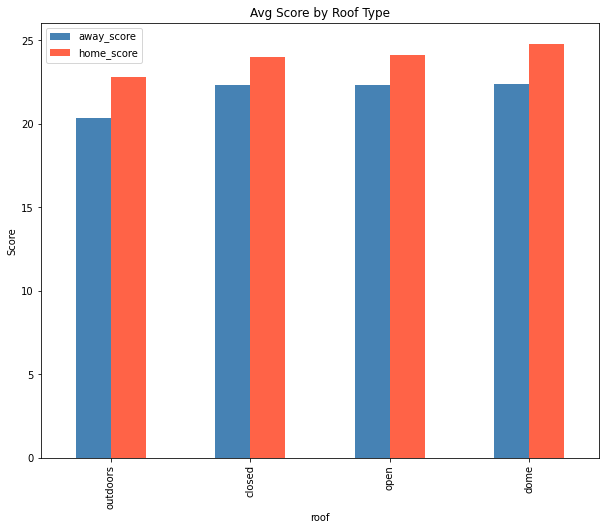

In [94]:
##plotting home qb data with bar chart
ax = home_qb_roof[['away_score','home_score']].plot.bar(figsize=(10,8),color=['#4682B4','#FF6347'])
##plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left', borderaxespad=0)
plt.title('Avg Score by Roof Type')
plt.ylabel('Score')

##labeling scores to be 1 decimal point

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f') 

## comparing indoor and outdoor QBs 1999-present

In [ ]:
##comparing indoor and outdoor QBs 1999-present
in_out_qb = home_qb[['away_score','home_score',
                        'indoor_outdoor','temp','wind','total']]

##indoor QB = 0, outdoor = 1
indoor_qb = in_out_qb[in_out_qb.indoor_outdoor == 0]
outdoor_qb = in_out_qb[in_out_qb.indoor_outdoor == 1]

#getting a mean of the common stats
indoor_qb = indoor_qb.mean()
outdoor_qb = outdoor_qb.mean()

#creating DF with .mean()
in_out = pd.DataFrame(
    {'Indoor QB': indoor_qb,
     'Outdoor QB': outdoor_qb
    })

#transposing the dataframe
in_out = in_out.T
in_out

## plotting indoor vs outdoor qb data

In [ ]:
##plotting indoor vs outdoor qb data
ax2 = in_out[['away_score','home_score']].plot.bar(figsize=(10,10),color=['#4682B4','#FF6347'])
plt.legend(loc=0)
plt.title('Stadium Comparision: Indoor vs. Outdoor QB Scores')
plt.ylabel('Score')
##labeling scores
for c in ax2.containers:
    ax2.bar_label(c, fmt='%.1f') 

NameError: name 'in_out' is not defined

## subselecting necessary columns

In [ ]:
##subselecting necessary columns
#NFL game data from 2019-2022

team_perform = recentgames[['season','game_type','week','gameday','weekday','W/L','away_team','away_qb_name','away_score','home_team','home_qb_name','home_score','location','result','indoor_outdoor',
                        'roof','surface','temp','wind','totyards','o_totyards','passyds','o_passyds','rushyds','o_rushyds']]
##dropping NA's from specific columns
team_perform.head(5)

,season,game_type,week,gameday,weekday,W/L,away_team,away_qb_name,away_score,home_team,...,roof,surface,temp,wind,totyards,o_totyards,passyds,o_passyds,rushyds,o_rushyds
0,2019,REG,1,2019-09-08,Sunday,L,BUF,Josh Allen,17.0,NYJ,...,outdoors,fieldturf,77.0,6.0,223.0,370.0,155.0,242.0,68.0,128.0
2,2019,REG,1,2019-09-08,Sunday,W,CIN,Andy Dalton,20.0,SEA,...,outdoors,fieldturf,64.0,7.0,232.0,429.0,160.0,395.0,72.0,34.0
3,2019,REG,1,2019-09-08,Sunday,T,DET,Matthew Stafford,27.0,ARI,...,closed,grass,NaN,NaN,387.0,477.0,275.0,361.0,112.0,116.0
4,2019,REG,1,2019-09-08,Sunday,W,NYG,Eli Manning,17.0,DAL,...,closed,fieldturf,NaN,NaN,429.0,271.0,257.0,171.0,172.0,100.0
5,2019,REG,1,2019-09-08,Sunday,L,SF,Jimmy Garoppolo,31.0,TB,...,outdoors,grass,93.0,9.0,295.0,256.0,174.0,158.0,121.0,98.0


In [ ]:
#how do home and away teams score based on having indoor/outdoor stadiums?
home_team = team_perform[['home_score','indoor_outdoor','home_team','passyds','rushyds','W/L']].groupby('home_team').mean()
away_team = team_perform[['home_score','indoor_outdoor','away_team','passyds','rushyds','W/L']].groupby('away_team').mean()
home_away = home_team.join(away_team, lsuffix='_home',rsuffix='_away')
home_away['pt_diff'] = home_away['home_score_away'] - home_away['home_score_home']
home_away['pass_diff'] = home_away['passyds_away'] - home_away['passyds_home']
home_away['rush_diff'] = home_away['rushyds_away'] - home_away['rushyds_home']
home_away = home_away.round(decimals=2)

In [ ]:
#indoor teams performance
#lookng at indoor score of less than 0.05
#some teams played outdoor then transferred to indoor stadiums, so I pulled less than 0.05

home_indoor = home_away.loc[home_away['indoor_outdoor_home'] < 0.10]
home_indoor.sort_values(by='pt_diff')

,home_score_home,indoor_outdoor_home,passyds_home,rushyds_home,home_score_away,indoor_outdoor_away,passyds_away,rushyds_away,pt_diff,pass_diff,rush_diff
home_team,,,,,,,,,,,
DAL,32.50,0.00,237.30,147.80,22.53,0.73,233.93,117.27,-9.97,-3.37,-30.53
MIN,26.67,0.00,252.60,132.53,22.89,0.78,206.22,127.17,-3.78,-46.38,-5.37
IND,25.27,0.00,220.00,140.07,22.07,0.80,245.80,84.80,-3.20,25.80,-55.27
NO,23.06,0.06,218.94,119.78,20.09,0.73,202.09,120.82,-2.96,-16.85,1.04
DET,25.25,0.06,259.12,104.94,22.42,0.67,242.92,121.50,-2.83,-16.21,16.56
ARI,24.67,0.00,205.75,134.17,22.75,0.92,233.83,135.17,-1.92,28.08,1.00
ATL,22.38,0.06,238.62,103.44,27.39,0.72,258.33,131.06,5.01,19.71,27.62
HOU,21.71,0.00,241.64,122.36,27.06,0.72,250.22,137.33,5.34,8.58,14.98


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

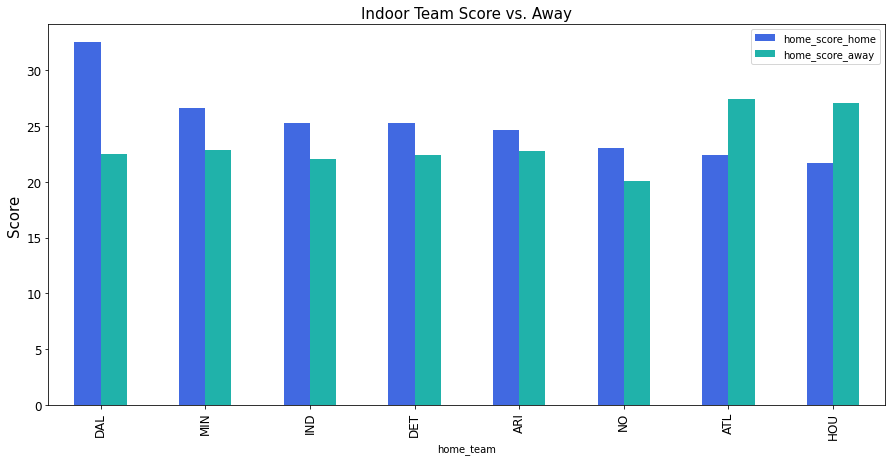

In [ ]:
##indoor vs outdoor graph
hi = home_indoor[['home_score_home','home_score_away']].sort_values('home_score_home', ascending=False).plot(kind='bar',stacked=False,figsize=(15,7),
             fontsize='12', color={'home_score_home':'#4169E1','home_score_away':'#20B2AA'})
plt.legend()
plt.ylabel('Score',fontsize='15')
plt.title('Indoor Team Score vs. Away',fontsize='15')
for h in hi.containers:
    hi.bar_label(h, fmt='%.0f') 


In [ ]:
#outdoor teams performance
home_outdoor = home_away.loc[(home_away['indoor_outdoor_home'] >= 0.95) & (home_away['indoor_outdoor_away'] <= .75)]
#home_outdoor.sort_values(by='pt_diff')
home_outdoor

,home_score_home,indoor_outdoor_home,passyds_home,rushyds_home,home_score_away,indoor_outdoor_away,passyds_away,rushyds_away,pt_diff,pass_diff,rush_diff
home_team,,,,,,,,,,,
CAR,19.65,1.0,221.71,113.12,24.69,0.38,197.38,109.46,5.05,-24.32,-3.66
CHI,19.00,1.0,186.41,123.35,25.13,0.47,216.40,129.33,6.13,29.99,5.98
DEN,18.00,1.0,191.46,130.92,22.20,0.67,241.53,107.67,4.20,50.07,-23.26
GB,25.73,1.0,250.64,130.00,22.11,0.67,203.22,124.00,-3.62,-47.41,-6.00
JAX,17.60,1.0,233.47,83.67,29.67,0.50,250.92,190.33,12.07,17.45,106.67
NYG,19.08,1.0,204.08,110.42,26.25,0.69,261.19,113.38,7.17,57.10,2.96
PHI,23.00,1.0,209.08,137.58,28.29,0.64,232.64,119.50,5.29,23.56,-18.08
SEA,27.27,1.0,253.80,140.40,24.73,0.67,257.07,123.40,-2.53,3.27,-17.00
TB,28.68,1.0,306.59,87.50,21.63,0.53,246.79,89.63,-7.05,-59.80,2.13


## outdoor team performance away

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

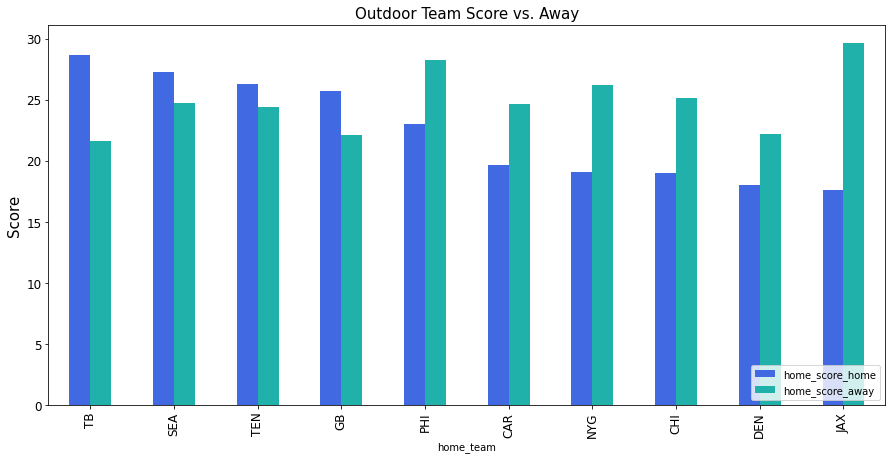

In [ ]:
##outdoor team performance away

ho = home_outdoor[['home_score_home','home_score_away']].sort_values('home_score_home', ascending=False).plot(kind='bar',stacked=False,figsize=(15,7),
             fontsize='12', color={'home_score_home':'#4169E1','home_score_away':'#20B2AA'})
plt.legend(loc=4)
plt.ylabel('Score',fontsize='15')
plt.title('Outdoor Team Score vs. Away',fontsize='15')
for h in ho.containers:
    ho.bar_label(h, fmt='%.0f') 


In [ ]:
##adding number of starts by qb - home
team_perform['home_qb_starts'] = team_perform.groupby('home_qb_name')['home_qb_name'].transform('size')
team_perform.head(5)

C:\Users\e203269\AppData\Local\Temp\1/ipykernel_26432/3417672957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_perform['home_qb_starts'] = team_perform.groupby('home_qb_name')['home_qb_name'].transform('size')


,season,game_type,week,gameday,weekday,W/L,away_team,away_qb_name,away_score,home_team,...,surface,temp,wind,totyards,o_totyards,passyds,o_passyds,rushyds,o_rushyds,home_qb_starts
0,2019,REG,1,2019-09-08,Sunday,L,BUF,Josh Allen,17.0,NYJ,...,fieldturf,77.0,6.0,223.0,370.0,155.0,242.0,68.0,128.0,12
2,2019,REG,1,2019-09-08,Sunday,W,CIN,Andy Dalton,20.0,SEA,...,fieldturf,64.0,7.0,232.0,429.0,160.0,395.0,72.0,34.0,14
3,2019,REG,1,2019-09-08,Sunday,T,DET,Matthew Stafford,27.0,ARI,...,grass,NaN,NaN,387.0,477.0,275.0,361.0,112.0,116.0,11
4,2019,REG,1,2019-09-08,Sunday,W,NYG,Eli Manning,17.0,DAL,...,fieldturf,NaN,NaN,429.0,271.0,257.0,171.0,172.0,100.0,9
5,2019,REG,1,2019-09-08,Sunday,L,SF,Jimmy Garoppolo,31.0,TB,...,grass,93.0,9.0,295.0,256.0,174.0,158.0,121.0,98.0,9


In [ ]:
##creating away QB starts in it's own dataframe, then merging it into the team_perform dataframe
awayqb = team_perform['away_qb_name']
awayqb = pd.DataFrame(awayqb)
awayqb['away_qb_starts'] = team_perform.groupby('away_qb_name')['away_qb_name'].transform('size')
awayqb

,away_qb_name,away_qb_starts
0,Josh Allen,19
2,Andy Dalton,12
3,Matthew Stafford,5
4,Eli Manning,1
5,Jimmy Garoppolo,13
...,...,...
518,Joe Burrow,11
519,Josh Allen,19
520,Aaron Rodgers,9
521,Andy Dalton,12


In [ ]:
#merging away qb starts with entire df
#this will duplicate a lot of the data. i dont know how to merge without duplication
team_perform = pd.merge(team_perform,
                        awayqb,
                        on='away_qb_name',
                        #left_on='away_qb_name',
                        #right_on='away_qb_name',
                        how='left') 
team_perform[['home_qb_name','away_qb_name','home_qb_starts','away_qb_starts']]

,home_qb_name,away_qb_name,home_qb_starts,away_qb_starts
0,Sam Darnold,Josh Allen,12,19
1,Sam Darnold,Josh Allen,12,19
2,Sam Darnold,Josh Allen,12,19
3,Sam Darnold,Josh Allen,12,19
4,Sam Darnold,Josh Allen,12,19
...,...,...,...,...
4699,Jared Goff,Kirk Cousins,7,18
4700,Jared Goff,Kirk Cousins,7,18
4701,Jared Goff,Kirk Cousins,7,18
4702,Jared Goff,Kirk Cousins,7,18


# dropping duplicates

In [ ]:
#dropping duplicates
team_perform = team_perform.drop_duplicates()
##using describe to confirm we still have the 449 unique rows
team_perform.describe()

,season,week,away_score,home_score,result,indoor_outdoor,temp,wind,totyards,o_totyards,passyds,o_passyds,rushyds,o_rushyds,home_qb_starts,away_qb_starts
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,296.000000,296.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,2020.176991,9.261062,22.557522,23.823009,1.265487,0.727876,58.672297,8.837838,351.960177,344.878319,230.796460,230.176991,121.163717,114.701327,10.858407,10.407080
std,0.976260,5.503314,9.899439,9.843773,13.982420,0.445546,17.343510,5.213482,84.667018,87.438243,78.491251,80.285077,54.611993,51.944083,5.708153,5.226382
min,2019.000000,1.000000,0.000000,0.000000,-43.000000,0.000000,7.000000,0.000000,105.000000,105.000000,12.000000,-6.000000,3.000000,8.000000,1.000000,1.000000
25%,2019.000000,4.000000,16.000000,17.000000,-6.000000,0.000000,45.000000,5.000000,295.750000,281.750000,174.000000,173.000000,83.000000,74.000000,7.000000,7.000000
50%,2020.000000,9.000000,23.000000,24.000000,1.500000,1.000000,59.000000,8.000000,360.000000,349.500000,228.500000,227.500000,112.000000,106.000000,10.000000,11.000000
75%,2021.000000,14.000000,30.000000,30.000000,10.000000,1.000000,73.000000,12.000000,410.250000,402.000000,281.250000,280.000000,149.250000,146.000000,15.000000,13.000000
max,2022.000000,21.000000,51.000000,56.000000,40.000000,1.000000,93.000000,27.000000,592.000000,572.000000,467.000000,461.000000,294.000000,288.000000,22.000000,19.000000


In [ ]:
#validing data
#team_perform.loc[(team_perform['home_qb_name' == 'Bailey Zappe')
                               
#team_perform.loc[(team_perform['home_qb_name'] == 'Bailey Zappe')]
team_perform.loc[(team_perform['away_qb_name'] == 'Baker Mayfield')]

,season,game_type,week,gameday,weekday,W/L,away_team,away_qb_name,away_score,home_team,...,temp,wind,totyards,o_totyards,passyds,o_passyds,rushyds,o_rushyds,home_qb_starts,away_qb_starts
161,2019,REG,2,2019-09-16,Monday,L,CLE,Baker Mayfield,23.0,NYJ,...,72.0,3.0,262.0,375.0,169.0,305.0,93.0,70.0,2,11
228,2019,REG,4,2019-09-29,Sunday,L,CLE,Baker Mayfield,40.0,BAL,...,83.0,8.0,395.0,530.0,222.0,337.0,173.0,193.0,17,11
917,2019,REG,13,2019-12-01,Sunday,W,CLE,Baker Mayfield,13.0,PIT,...,46.0,6.0,323.0,279.0,199.0,173.0,124.0,106.0,2,11
1084,2019,REG,15,2019-12-15,Sunday,W,CLE,Baker Mayfield,24.0,ARI,...,NaN,NaN,445.0,393.0,219.0,241.0,226.0,152.0,11,11
1242,2019,REG,17,2019-12-29,Sunday,L,CLE,Baker Mayfield,23.0,CIN,...,64.0,7.0,451.0,333.0,272.0,187.0,179.0,146.0,7,11
1428,2020,REG,1,2020-09-13,Sunday,W,CLE,Baker Mayfield,6.0,BAL,...,76.0,5.0,381.0,306.0,270.0,168.0,111.0,138.0,17,11
1920,2020,REG,7,2020-10-25,Sunday,L,CLE,Baker Mayfield,37.0,CIN,...,48.0,8.0,353.0,434.0,285.0,219.0,68.0,215.0,7,11
2421,2020,REG,13,2020-12-06,Sunday,L,CLE,Baker Mayfield,41.0,TEN,...,52.0,1.0,431.0,458.0,369.0,340.0,62.0,118.0,16,11
2782,2020,DIV,19,2021-01-17,Sunday,W,CLE,Baker Mayfield,17.0,KC,...,40.0,13.0,438.0,308.0,315.0,196.0,123.0,112.0,22,11
3718,2021,REG,12,2021-11-28,Sunday,W,CLE,Baker Mayfield,10.0,BAL,...,43.0,0.0,303.0,262.0,155.0,222.0,148.0,40.0,17,11


In [ ]:
#qb performance at home with over 10 starts
qb_home = team_perform[['home_qb_name','home_score','home_team','indoor_outdoor',
                        'home_team','passyds','rushyds','home_qb_starts']].groupby(['home_qb_name']).mean()
qb_home = qb_home.round(decimals=2)
qb_home.sort_values(by='home_qb_starts',ascending=False)



,home_score,indoor_outdoor,passyds,rushyds,home_qb_starts
home_qb_name,,,,,
Patrick Mahomes,28.18,1.0,290.14,103.23,22.0
Tom Brady,28.05,1.0,277.48,83.71,21.0
Josh Allen,26.63,1.0,212.74,138.58,19.0
Lamar Jackson,27.53,1.0,189.41,182.12,17.0
Ryan Tannehill,26.88,1.0,237.31,144.88,16.0
...,...,...,...,...,...
Eli Manning,36.00,1.0,274.00,138.00,1.0
Colt McCoy,10.00,0.0,104.00,65.00,1.0
Brian Hoyer,12.00,0.0,191.00,109.00,1.0


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

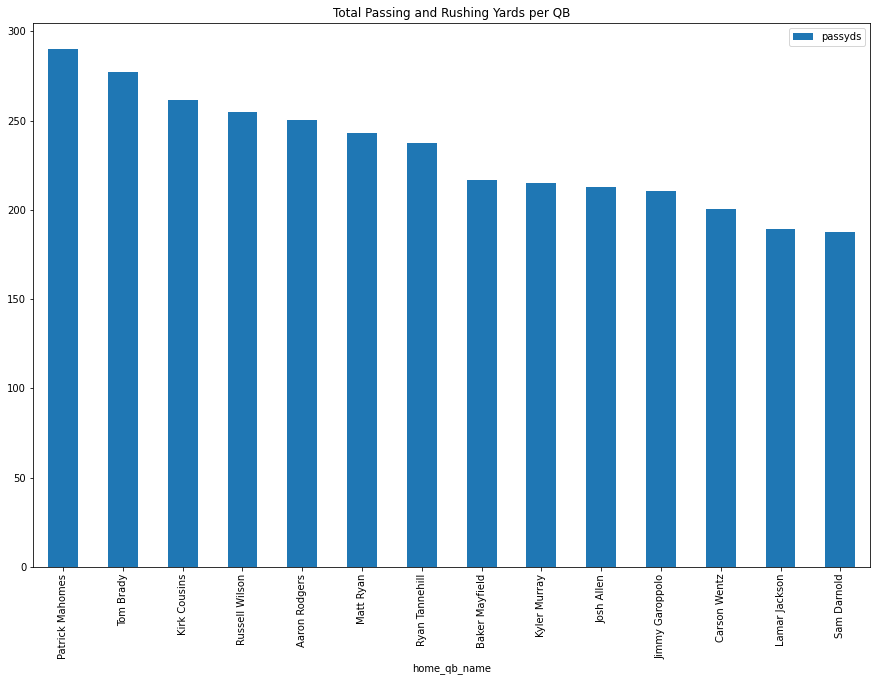

In [ ]:
#Quarterbacks with at least 10 starts and their passing yard performance
qb10 = qb_home.loc[(qb_home['home_qb_starts'] > 10)]
qb10 = qb10[['passyds']].sort_values('passyds', ascending=False).plot(kind='bar',stacked=True,figsize=(15,10),
             title= 'Total Passing and Rushing Yards per QB')

for q in qb10.containers:
    qb10.bar_label(q, fmt='%.1f') 

In [ ]:
#qb performance at away with over 10 starts
qb_away = team_perform[['away_qb_name','away_score','indoor_outdoor',
                        'away_team','passyds','rushyds','away_qb_starts']].groupby(['away_qb_name']).mean()
qb_away = qb_away.round(decimals=2)
qb_away.sort_values(by='away_qb_starts',ascending=False)
qb_away.loc[(qb_away['away_qb_starts'] > 10)]


In [ ]:
print(len(qb_home.loc[(qb_home['home_qb_starts'] > 10)]))
print(len(qb_away.loc[(qb_away['away_qb_starts'] > 10)]))

In [ ]:
#team performance over the years
team = team_perform[['home_team','totyards',
                        'away_team','passyds','rushyds','home_score']].groupby(['home_team']).mean()
team = team.round(2
home_away

# team passing perform

In [ ]:
#team passing perform
teampass = home_away[['passyds_home','passyds_away']].groupby(['home_team']).mean()
teampass = teampass.round(2)
teampassplot = teampass.plot.barh(figsize=(10,15),color =['#40E0D0','#FA8072'])
plt.legend(loc=4, prop={'size': 10})    
plt.title('Team Passing Performance at Home vs. Away')
for c in teampassplot.containers:
    teampassplot.bar_label(c, fmt='%.0f')     


In [ ]:
#team rush 
teamrush = home_away[['rushyds_home','rushyds_away']].groupby(['home_team']).mean()
teamrush = teamrush.round(2)
teamrushplot = teamrush.plot.barh(figsize=(10,15),color =['#40E0D0','#FA8072'])
plt.legend(loc=4, prop={'size': 10})   

plt.title('Team Rushing Performance at Home vs. Away')
for c in teamrushplot.containers:
    teamrushplot.bar_label(c, fmt='%.0f')     

In [ ]:
#team score

teamscore = home_away[['home_score_home','home_score_away']].groupby(['home_team']).mean()
teamscore = teamscore.round(2)
teamscoreplot = teamscore.plot.barh(figsize=(10,15),color =['#40E0D0','#FA8072'])
plt.legend(loc=4, prop={'size': 10})   

plt.title('Team Scores at Home vs. Away')
for c in teamscoreplot.containers:
    teamscoreplot.bar_label(c, fmt='%.0f')   

In [ ]:
teamrush = team[['rushyds']].sort_values(by='rushyds',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10),color='#4169E1')
            # title= 'Team Performance')
    
for q in teamrush.containers:
    teamrush.bar_label(q, fmt='%.1f') 

In [ ]:
team[['passyds','rushyds']].sort_values(by='passyds', ascending=False).plot(kind='bar',stacked=True,figsize=(20,10))
            # title= 'Team Performance')

In [ ]:
teamall = team_perform[['home_team',
                        'passyds','rushyds','home_score']].groupby(['home_team']).mean()
teamallplt = teamall.plot.bar(title='Home Team Performance',fontsize=15,subplots=True,figsize=(30,15))

In [ ]:
teamrecords = team_perform[['season','home_team','W/L']].groupby(['season','home_team','W/L']).value_counts()
teamrecords

In [ ]:
##wins since 2019
wins = games[['home_team','WL']].groupby(['WL']).value_counts().to_frame('wins')
wins = wins.sort_values('wins',ascending=False)
wins 

In [ ]:
#teams number of home game wins
teamwins = wins.plot.bar(figsize=(20,7))


plt.title('Team Name')
plt.ylabel('Wins')

##labeling scores to be 1 decimal point

for c in teamwins.containers:
    teamwins.bar_label(c, fmt='%.0f') 

In [ ]:
#teams number of wins since 2019
teamwins = wins.plot.bar(figsize=(20,7))


plt.title('Team Name')
plt.ylabel('Wins')

##labeling scores to be 1 decimal point

for c in teamwins.containers:
    teamwins.bar_label(c, fmt='%.0f') 

In [ ]:
recentgames[['home_team','totyards','passyds','rushyds','home_score','1st_downs','temp','wind']].groupby('home_team').mean()

In [ ]:
#offense performance in different environments

yards = team_perform[['totyards','passyds','rushyds','roof']].groupby(['roof']).mean()

yards = yards.T
yardsplot = yards.plot.bar(figsize=(12,8),color=['#1E90FF','#7B68EE','#DB7093','#00FF7F'])
plt.legend(loc=1, prop={'size': 20})
plt.title('Yards by Stadium Type',fontsize='20')
plt.ylabel('Yards',fontsize='10')
for c in yardsplot.containers:
    yardsplot.bar_label(c, fmt='%.1f') 

In [ ]:
#offense score in different environments

scoreroof = team_perform[['home_score','away_score','roof']].groupby(['roof']).mean()

scoreroof = scoreroof.T
scoreroofplot = scoreroof.plot.bar(figsize=(10,8),color=['#1E90FF','#7B68EE','#DB7093','#00FF7F'])
plt.legend(loc=1, prop={'size': 10})
plt.title('Scores by Stadium Type',fontsize='20')
plt.ylabel('Score',fontsize='10')
for c in scoreroofplot.containers:
    scoreroofplot.bar_label(c, fmt='%.1f') 

In [ ]:
teampero

In [ ]:
#home_away.plot.bar(x='home_team', y='passyds_home')

test = home_away[['W/L','home_score_home','home_score_away']].groupby(['home_team']).mean()

test.plot.bar(figsize=(20,10))

# analysis of surface grass vs turf impacts

In [ ]:
### Renjini - starts analysis of surface grass vs turf impacts
#       Prupose: Understand whether a specific surface impacts overall team performance
#              : Top Performers on each of the surfaces
#              : Plot the trends for easy refernece
#    Assumption: Input file has many different turf surfaces. For anlaysis purposes it is divided into two categories
#                Grass and Turf
#   File Source: Kaggle

In [ ]:
#reading CSVs
games_surface1 = pd.read_csv('http://www.habitatring.com/games.csv')

In [ ]:
games_surface1.info()

In [ ]:
##dropping unnecessary columns in games
games_surface2 = games_surface1.drop(['old_game_id','gametime','away_qb_id','home_qb_id',
              'gsis','nfl_detail_id','pfr','pff','espn','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds',
              'total_line','under_odds','over_odds','referee','away_coach','home_coach','home_qb_name','away_qb_name'],axis=1)



In [ ]:
games_surface2.head(3)

In [ ]:
games_surface2.info()

In [ ]:
#looking for unique values in surface
surface_val=games_surface2.surface.unique()

print(surface_val)

In [ ]:
#replace 'grass ' to 'grass'

games_surface2.loc[games_surface2["surface"] == "grass ", "surface"] = 'grass'

In [ ]:
#droping null values
games_surface2 = games_surface2.dropna(subset=['surface'])
surface_val=games_surface2.surface.unique()

print(surface_val)

In [ ]:
#prepping for a pie chart anlayis to visualze the surface spread
    
games_surface2_count=(games_surface2.pivot_table(index='surface',
                                        values=['game_id'],
                                      aggfunc='count',fill_value=0))
games_surface2_count

In [ ]:
games_surface2_count[['game_id']].plot(kind='pie',subplots=True,figsize=(10,10),
                                      explode=(0, 0, 0, 0, 0, 0.1,0,0),
                                      title='Number of games on all surfaces')


In [ ]:
#Obeservation1: Majority of games played on Grass
#Next Action: Club the non-Grass surfaces into common surface as 'turf'

In [ ]:
games_surface3=games_surface2
games_surface3.loc[games_surface3['surface']=='astroturf','surface']='turf'
games_surface3.loc[games_surface3['surface']=='fieldturf','surface']='turf'
games_surface3.loc[games_surface3['surface']=='astroplay','surface']='turf'
games_surface3.loc[games_surface3['surface']=='dessograss','surface']='turf'
games_surface3.loc[games_surface3['surface']=='sportturf','surface']='turf'
games_surface3.loc[games_surface3['surface']=='matrixturf','surface']='turf'
games_surface3.loc[games_surface3['surface']=='a_turf','surface']='turf'

In [ ]:
#unique values for surafce

games_surface3_count=(games_surface3.pivot_table(index='surface',
                                        values=['game_id'],
                                      aggfunc='count',fill_value=0))
games_surface3_count[['game_id']].plot(kind='pie',subplots=True,figsize=(10,10),
                                      explode=(0.1, 0.1),
                                      title='Number of games on all surfaces')

In [ ]:
# Analyzing the results of the games played
result_val=games_surface3.result.unique()
result_val.sort()
print(result_val)

In [ ]:
#dropping null values as those games are yet to play
games_surface3 = games_surface3.dropna(subset=['result'])

In [ ]:
# Result column is the difference between home team score and away team score. 
#If the result is negative, the it is a lose for home team.
#adding a new colum to identify the win/lose/tie
def winlosetie(pt):
    if pt > 0:
        return 1
    elif pt==0:
        return 0
    else:
        return -1
games_surface3['Netresult']= games_surface3['result'].apply(winlosetie)

In [ ]:
#spot checking the Net Result Field 
games_surface3[['game_id','home_team','home_score','away_team','away_score','result','Netresult','surface']]

In [ ]:
games_surafce3_check=(games_surface3.pivot_table(index='surface', columns= 'home_team',
                                        values=['Netresult'],
                                      aggfunc=['min','max'],fill_value=0))
games_surafce3_check

In [ ]:
#getting the column names
print(games_surface3.columns.tolist())

In [ ]:
games_surface4=games_surface3[games_surface3['result'] > 0]
games_surface5=games_surface3[games_surface3['result'] < 0]
##dropping unnecessary columns in games
games_surface4 = games_surface4.drop(['season','game_type','week','gameday','weekday'],axis=1)  
games_surface5 = games_surface5.drop(['season','game_type','week','gameday','weekday'],axis=1)

In [ ]:

games_surface4.rename(columns = {'home_team':'winner'}, inplace = True)
games_surface4.info()

In [ ]:
games_surface4 = games_surface4.drop(['away_team','away_score','home_score'],axis=1)  

In [ ]:
games_surface5.rename(columns = {'away_team':'winner'}, inplace = True)
games_surface5.info()

In [ ]:
games_surface5 = games_surface5.drop(['home_team','away_score','home_score'],axis=1)  
games_surface5.info()

In [ ]:
# concatenating the above two data frames to get a winner data frame
games_surface_winner=pd.concat([games_surface4, games_surface5])
games_surface_winner.tail(10)

In [ ]:
# Analysis to find the number of games won
games_surface_winner_total1=games_surface_winner[['surface','winner','game_id','location']].groupby(['winner','surface','location'],).count()
games_surface_winner_total1


In [ ]:
games_surface_winner_total_pivot=games_surface_winner.pivot_table(index='winner',columns=['surface','location'],
                                                                  values=['game_id'],
                                                                 aggfunc='count',fill_value=0)
games_surface_winner_total_pivot

In [ ]:
#heatmap of winners
# Winner and Surface vs sum of game_id
from pivottablejs import pivot_ui

pivot_ui(games_surface_winner_total1)

In [ ]:
games_surface_winner_total=games_surface_winner[['surface','winner','game_id']].groupby(['winner','surface']).count()
games_surface_winner_total

In [ ]:
# Grass Top Performers Heatmap
pivot_ui(games_surface_winner_total)
#surface(Grass) , winner vs sum of game id

In [ ]:
#Top Turf Performances:
pivot_ui(games_surface_winner_total)
#surface(Turf) , winner vs sum of game id

In [ ]:
#Overall  Team Performances:


pivot_ui(games_surface_winner_total)
# Bar Chart(Surface/Winner vs sum of game_id)

# Playoff Statistics Analysis Starts here

In [ ]:
### Renjini # Playoff Statistics Analysis Starts here
#       Prupose: Review the performance of teams reached playoff over the seasons
#              : Top Performers
#              : Plot the trends for easy refernece
#              : Correlation between the team performance in regular season towards the seed/divsion rank
#   File Source: Kaggle

In [ ]:
# get current working directory - to ensure program and file are in the same directory
print(os.getcwd())

In [ ]:
#Reading input file
standings_df = pd.read_csv("http://www.habitatring.com/standings.csv")

In [ ]:
#Next few blocks to explore the dataframe
standings_df.info()

In [ ]:
#listing column names
column_names = list(standings_df.columns.values)
column_names

In [ ]:
standings_df.describe()

In [ ]:
standings_df.head(3)

In [ ]:
#merging data from games file(previously read for surface analysis ) to standings
games_standings=pd.merge(games_surface1, standings_df, left_on=['season','home_team'],right_on=['season','team'], how='inner')



In [ ]:
games_standings.info()

In [ ]:
#checking the palyoff field values
playoff_val=games_standings.playoff.unique()

print(playoff_val)

In [ ]:
#removing null values
games_standings1 = games_standings.dropna(subset=['playoff'])

In [ ]:
games_standings1.info()

In [ ]:
#removes null from standings dataframe also
standings_df2 = standings_df.dropna(subset=['playoff'])

In [ ]:
#gets the seasons in scope
seasons_val=standings_df2.season.unique()

print(seasons_val)

In [ ]:
#Pivoting Seasons to ranks
standings_df2_net=standings_df2.pivot_table(index='team',columns= 'season',values=['div_rank','net'],
                                      aggfunc='sum',fill_value=0)
standings_df2_net

In [ ]:
# scatter matrix 
pd.plotting.scatter_matrix(standings_df2[['seed','sos']])

In [ ]:
#correlation between seed, netpoints, divisional rank, and win rate
corr_standings=standings_df2[['div_rank','sos','seed']].corr()
corr_standings

In [ ]:
#Observation from the above correlation table:
#seed has a positve correlation to divison rank. 
#seed is determined by the regular season wins. A good regular season ensures a good seed.
#If you win and get a higher seed, you will have a home field advantage during the playoffs.



In [ ]:
sns.heatmap(corr_standings)
plt.show()

In [ ]:
# Scatter plot to show the relation between Total scores and Win Percent
x= games_standings['scored']
y= games_standings['pct']
plt.scatter(x,y)
#plt.show()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Correlation between Scored and Win Percent')
plt.xlabel('Scored')
plt.ylabel('pct')
plt.show()

In [ ]:
#team standings/season
standings_team_season = standings_df2[['seed','wins','pct','team','season','conf']].groupby(['season','conf','team']).mean()
standings_team_season

In [ ]:
#Next few bloacks are to understand the winning trends
standings_team = standings_df2[['wins','pct','team','season']].groupby(['season','team']).mean()
standings_team

In [ ]:
standings_team_index = standings_df2.pivot_table(index='team',values=['losses','wins'],
                                        aggfunc=['sum'],fill_value=0)
standings_team_index

In [ ]:
#Regression plot showing total number of wins/season
sns.regplot(data=standings_df2, x="season", y="wins",)

In [ ]:
# Above plots shows a trend line around 11 games
# Estimator bar chart: 
# a prediction on the number of typical wins a team has to have in the regular season to land themselves in playoff
sns.barplot(data=standings_df2, x="season", y='wins')

In [ ]:
#Observation: '12 Wins' in regular season could gurantee a playoff spot

In [ ]:
# Team win/Loss Stats all throughout seasons
dplot = standings_team_index.plot.bar(figsize=(10,5),stacked=False,color=('blue','green'))

labels = ['Losses', 'Wins']
leglabs = ['Number of Losses', 'Number of wins']
dplot.legend(leglabs)
dplot.set_ylabel('Number of Wins,Losses')
dplot.set_xlabel('Team')
dplot.set_title('Team Win/Loss Stats')
dplot.grid()
print(dplot)

# Special Team(Field Goal Kikcers) Performance Analysis Starts here

In [ ]:
### Renjini # Special Team(Field Goal Kikcers) Performance Analysis Starts here
#       Prupose: To review and understand the historical trends specific to field goals
#              : To review and understand the historical trends
#                a. Longest Field Goals Made by Teams Over the Years
#                b. Compare the Attempts Made to Acutals
#                c. Overall 50+ Yards Field Goals made over the Years
#              : Visualize the interpretations using plots and graphs
# Data Source: https://www.kaggle.com/code/blueblowfish/nfl-data-analysis/data

In [ ]:
#Gets the current directory
print(os.getcwd())

In [ ]:
# Reads the downloaded csv file from the path
datapath= '/Users/renjinirajan/Downloads//Career_Stats_Field_Goal_Kickers.csv'
kickers_df_init = pd.read_csv(datapath, sep=',')

In [ ]:
#Next few bloack to explore data
kickers_df_init.info()

In [ ]:
# Based on the information stats from above - it looks like Column Position has maximum null values. 
#This file is about attempting  field goals, hence player position seems to irrelevant. Droping colum Position
kickers_df1=kickers_df_init.drop(['Position'], axis=1)

In [ ]:
kickers_df1.info()

In [ ]:
#looking for unique values in Year
years_in=kickers_df1.Year.unique()
years_in.sort()
print(years_in)

In [ ]:
#based on the Year Data - file contains data from 1933 thru 2016
#creating a new data frame with year from 2000 thru 2016
kickers_df2=kickers_df1[kickers_df1.Year >= 2000]

In [ ]:
kickers_df2.describe()

In [ ]:
#Longest FG Made by each Team over the Years
kickers_longFG = kickers_df2.pivot_table(index='Team',columns='Year',values='Longest FG Made',
                                        aggfunc=['max'],fill_value=0)
kickers_longFG

In [ ]:
# Who made the longest Field Goal??
longest_FG_details=(kickers_df2[kickers_df2['Longest FG Made'] == kickers_df2['Longest FG Made'].max()])

print ('Team:',longest_FG_details['Team'].to_string(index=False),'\n',
      'Year:',longest_FG_details['Year'].to_string(index=False),'\n',
      'Player Name:',longest_FG_details['Name'].to_string(index=False),'\n',
      'Total Distance:',longest_FG_details['Longest FG Made'].to_string(index=False))

In [ ]:
#Table to display FG's attempted vs FG's Made by Teams over the Year
kickers_chart=(kickers_df2.pivot_table(index='Team', columns='Year',values=['FGs Attempted','FGs Made'],
                                      aggfunc='sum',fill_value=0))
kickers_chart

In [ ]:
# plot of FGs attempted vs FGs Made
dplot = kickers_chart.plot.bar(stacked=False)
labels = ['Attempted', 'Made']
leglabs = ['FG Attempted', 'FG Made']
dplot.legend(leglabs)
dplot.set_ylabel('Number of FGs')
dplot.set_xlabel('FGs: Attempted, Made')
dplot.set_title('FGs attmepted vs FGs Made')
#dplot.set_xticklabels(labels)

print(dplot)

In [ ]:
#Table to display FG's attempted vs FG's Made by Teams over the Year from 2010 thru 2016
kickers_df3= kickers_df2[kickers_df2.Year > 2010]
kickers_50chart=(kickers_df3.pivot_table(index='Team', columns='Year',values=['FGs Attempted 50+ Yards','FGs Made 50+ Yards'],
                                      aggfunc='sum',fill_value=0))
kickers_50chart


In [ ]:
#Plotting for 50+ Yards Field Goals
kickers_50chart_total=kickers_df3.pivot_table(index='Year',values=['FGs Attempted 50+ Yards','FGs Made 50+ Yards'],
                                      aggfunc='sum',fill_value=0)

In [ ]:
kickers_50chart_total[['FGs Attempted 50+ Yards','FGs Made 50+ Yards']].plot(kind='bar',stacked=False,figsize=(10,10),title= '50+ Yards FG Stats')
            
    

In [ ]:
kickers_50chart_stack=kickers_50chart.stack()
kickers_50chart_stack=kickers_50chart_stack[kickers_50chart_stack>0]
kickers_50chart_stack

In [ ]:
# creating a pie chart of 50+ Yard Field Goals
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
kickers_50chart_stack.groupby(['Year']).sum().plot(kind='pie', y='FGs Made 50+ Yards',
                                                   explode=explode, autopct='%1.1f%%',
                                                   counterclock=False, shadow=True,
                                                   legend=None,
                                                  title='Percentage of 50+ Yard FGs over the Years')  

In [ ]:
#Observation: Looking at the above, highest% of 50+Yard Field Goals came in 2015 (for a period of 2011 thru 2016)

In [ ]:
#Table to display FG's attempted vs FG's Made by Teams over the Year
kickers_chart_FGMade=(kickers_df2.pivot_table(index='Year', values=['FGs Attempted','FGs Made'],
                                      aggfunc='sum',fill_value=0))
kickers_chart_FGMade

In [ ]:
#Generic Trend on Field Goals # shows 
    
kickers_chart_FGMade[['FGs Attempted','FGs Made']].plot(kind='bar',stacked=False,
                                                       title='FGs over the Years')

# Wind speeds (not normalized)

In [ ]:
# Effects of wind speeds - Team Scores per game. 
# Box plot showing all points to see outliers
# This takes care of the outliers for wind       x= games.where(games.wind.abs() < 50)['wind']     

games['abs_result'] = games.result.abs()
fig=px.box(games, x=games.where(games.wind.abs() < 50)['wind'], y='abs_result', hover_data=games.columns, points='all', width=1000)
fig.update_layout({'plot_bgcolor': 'black','paper_bgcolor': 'white',})
fig.update_layout(title={"text": "Effects of Wind Speed", "x": 0.5})
fig.update_layout(yaxis_title="Team Result")
fig.update_layout(xaxis_title="Wind Speed")
fig.show()

NameError: name 'px' is not defined

In [ ]:
# Effects of wind speeds - Game Score per game. 
# Box plot showing all points to see outliers
# This takes care of the outliers for wind       x= games.where(games.wind.abs() < 50)['wind']    


fig=px.box(games, x=games.where(games.wind.abs() < 50)['wind'], y='total', hover_data=games.columns, points='all', width=1000)
# x is adjusted to remove outlier wind conditions

fig.update_layout({'plot_bgcolor': 'black','paper_bgcolor': 'white',})   #  Set background color

fig.update_layout(title={"text": "Effects of Wind Speed", "x": 0.5})    # Set Title
fig.update_layout(yaxis_title="Game Score")
fig.update_layout(xaxis_title="Wind Speed")
fig.show()

In [ ]:
p_games= games[games['wind']>1]


p_games[['wind','total']].corr()



# Wind speeds (normalized)

In [ ]:
# This set of code will build a  list of team 
# then build a function which gets the mean score for that season
# the data output is team, season, mean score for each team in NFL
# Finally the data will be merged back to original complete df
# 
# Normalized home and away scoring is displayed. 

teams =  games.home_team.unique()       
asbs = pd.DataFrame()
for team in teams:
    tdf = games[(games.home_team == team) |  (games.away_team == team)]    # look through both home and away team list
    tdf['team'] = team
    def get_score(ser):
        if ser.home_team == team:
            return ser.home_score
        else:
            return ser.away_score
    tdf['score'] = tdf.apply(get_score, axis=1)    # axis=1 applies a function across each row
    tdf = tdf.groupby(['team','season']).score.mean().reset_index()
    asbs = asbs.append(tdf, ignore_index=True)
asbs

# merging data back
tgames = games.merge(asbs, left_on=['season', 'home_team'], right_on=['season', 'team'])
tgames = tgames.rename(columns={'score':'score_home_avg'})
tgames = tgames.merge(asbs, left_on=['season', 'away_team'], right_on=['season', 'team'])
tgames = tgames.rename(columns={'score':'score_away_avg'})

tgames['home_score_norm'] = tgames.home_score/tgames.score_home_avg
tgames['away_score_norm'] = tgames.away_score/tgames.score_away_avg
tgames['total_score_norm'] = tgames.home_score_norm + tgames.away_score_norm

tgames

# Effects of wind speeds -(Normalized)
fig=px.box(tgames, x='wind', y='total_score_norm',  points='all', height=400, width= 1000)
fig.update_layout({'plot_bgcolor': 'black','paper_bgcolor': 'white',})   #  Set background color
fig.update_layout(title={"text": "Effects of Wind Speed (Normalized)", "x": 0.5})
fig.update_layout(yaxis_title="Game Score")
fig.update_layout(xaxis_title="Wind Speed")
fig.show()

# Wind Speeds (by Teams)

In [ ]:
tgames['abs_result'] = tgames.result.abs()
descending_order = tgames['home_team'].value_counts().sort_values(ascending=False).index
fig = px.bar(tgames, x="home_team", y=tgames['abs_result'],color='who_won', barmode='group',height=400, width= 1000) 
fig.update_layout({'plot_bgcolor': 'black','paper_bgcolor': 'white',})   #  Set background color
fig.update_layout(title={"text": "Effects of Wind Speed (by each NFL team)", "x": 0.5})
fig.update_layout(yaxis_title="Game Score")
fig.update_layout(xaxis_title="Wind Speed")
fig.show()

In [ ]:
xgames = tgames.groupby(['home_team','who_won']).count()
xgames.reset_index(level=0, inplace=True)
type(xgames)
tgames['who_won']
#fig = px.funnel(games, x="home_team", y="who_won",color='who_won')
#fig.show()

In [ ]:

fig,ax = plt.subplots(figsize=(12,18))
descending_order = games['wind'].value_counts().sort_values(ascending=False).index
sns.countplot(data=games,y="wind",order=descending_order)
ax.set_title('')

games['wind'].describe()

In [ ]:
games['wind1'] = pd.cut(x=games['wind'], bins=[0,5,10,15,20,25,30,40,80], 
                labels=['5','10','15','20','25','30','40','80'])

games.wind1.head()
games_wind_categories = games.groupby(['wind1','who_won']).size().unstack()
games_wind_categories['win_perc'] = games_wind_categories['Home_team']/games_wind_categories['Away_team']
games_wind_categories
games_wind_categories.plot(y='win_perc',kind='line',stacked=False,title='Home Team Win Record (wind)', legend=False,ylabel='Home Team Win Record',xlabel='Average Winds (mph)')

# Wind speeds (correlations)

In [ ]:
games[['temp','wind', 'total']].corr()

# Wind speeds, Categorizations (New Columns)

In [ ]:
# Now we determine which team won based on results column
# (-) negative result shows home win lost
# (+) Positive result shows home team won
# This will add a new column to the df specifying win/loss for home team

games['result'].isna().sum()        # Look to see how many are nulls in the result column

def who_won(x):
    x = int(x)
    if x < 0 :
        return 'Away_team'
    elif x > 0 :
        return 'Home_team'
    elif x == 0:
        return 'Tie'

# Here we use (not = isna) and use function to determine if home team won/lost
games['who_won'] = games[~games['result'].isna()].result.apply(who_won)

games.head(1)


In [ ]:
# Now we will categorize the wind speeds
# and create a variable (column) called wind_category

def wind_category(x):
    if x == 0 or x==None:
        return 'No Speed'
    elif x > 0 and x <= 15:
        return 'Low Speed'
    elif x > 15 and x <= 30:
        return 'Medium Speed'
    elif x > 30 and x <= 45:
        return 'High Speed'
    elif x > 45 :
        return 'Extreme Speed'
    
games['wind_category'] = games['wind'].apply(wind_category)
##verify the def worked


games = games.convert_dtypes()
#print(games['wind'].dtypes)


# Wind condition, Stats like Mean & Median

In [ ]:
# mean
games.wind.describe()
games.where(games.wind.abs() < 50)['wind'].mean()

In [ ]:
# median
games.where(games.wind.abs() < 50)['wind'].median()

# Wind Speeds (time based)

In [ ]:
games['abs_result'] = games.result.abs()
fig=px.box(games, x='season', y='total', color='wind_category',hover_data=games.columns, points='all')
fig.update_layout(title={"text": "Effects of Wind Speed", "x": 0.5})
fig.update_layout(yaxis_title="Game Spread")
fig.update_layout(xaxis_title="Year (season)")
fig.show()

In [ ]:
# Effects of wind speeds - Total Game Score on yearly basis
fig = px.bar(games, x="season", y="total",color='wind_category', barmode='group',height=400, width= 1000)
fig.update_layout({'plot_bgcolor': 'black','paper_bgcolor': 'white',})   #  Set background color
fig.update_layout(title={"text": "Effects of Wind Speed - Year over year", "x": 0.5})    # Set Title
fig.update_layout(yaxis_title="Game Score")
fig.update_layout(xaxis_title="Wind Speed")
fig.show()


In [ ]:
# Effects of wind speeds - Total Game Score on yearly basis
fig = px.bar(games, x="season", y="total",color='who_won', barmode='group',height=400, width= 1000)
fig.update_layout({'plot_bgcolor': 'black','paper_bgcolor': 'white',})   #  Set background color
fig.update_layout(title={"text": "Effects of Wind Speed - Year over year", "x": 0.5})    # Set Title
fig.update_layout(yaxis_title="Game Score")
fig.update_layout(xaxis_title="Wind Speed")
fig.show()

# HomeTeam Winning Record

In [ ]:
def Hometeam_won(x):
    if x >= 0 :
        return 1
    else:
        return 0
    
games['Hometeam_won'] = games[~games['result'].isna()].result.apply(Hometeam_won)
##verify the def worked
games[['home_team','season','Hometeam_won']].head(5)

games.groupby(['home_team','season','Hometeam_won']).count()
#games.reset_index(level=0, inplace=True)
games.head(2)
games.where(games['Hometeam_won']==1).groupby(['home_team','season']).count()


## CALCULATE:   Season Wins, Season Losses, Home Wins, Home Losses

In [ ]:
# Season Wins ------------------------------------------------------------------------------------------------
teams =  games.home_team.unique()
asbs = pd.DataFrame()
for team in teams:
    tdf = games[(games.home_team == team) |  (games.away_team == team)]
    tdf['team1'] = team
    def get_wins(ser):
        if ser.home_team == team:
            if ser.result > 0:
                return 1
            else:
                return 0
        elif ser.away_team == team:
            if ser.result <0:
                return 1
            else: 
                return 0
    tdf['season_wins'] = tdf.apply(get_wins, axis=1)    # axis=1 applies a function across each row
    tdf = tdf.groupby(['team1','season']).season_wins.sum().reset_index()
    asbs = asbs.append(tdf, ignore_index=True)
asbs
games = games.merge(asbs, left_on=['season', 'home_team'], right_on=['season', 'team1'])
games = games.rename(columns={'season_wins':'season_wins'})


# Season Losses ------------------------------------------------------------------------------------------------
teams =  games.home_team.unique()
asbs = pd.DataFrame()
for team in teams:
    tdf = games[(games.home_team == team) |  (games.away_team == team)]
    tdf['team'] = team
    def get_losses(ser):
        if ser.home_team == team:
            if ser.result < 0:
                return 1
            else:
                return 0
        elif ser.away_team == team:
            if ser.result > 0:
                return 1
            else: 
                return 0
    tdf['season_losses'] = tdf.apply(get_losses, axis=1)    # axis=1 applies a function across each row
    tdf = tdf.groupby(['team','season']).season_losses.sum().reset_index()
    asbs = asbs.append(tdf, ignore_index=True)
asbs
games = games.merge(asbs, left_on=['season', 'home_team'], right_on=['season', 'team'])
games = games.rename(columns={'season_losses':'season_losses'})


# Home Wins ------------------------------------------------------------------------------------------------
teams =  games.home_team.unique()
asbs = pd.DataFrame()
for team in teams:
    tdf = games[(games.home_team == team) |  (games.away_team == team)]
    tdf['team'] = team
    def home_wins(ser):
        if ser.home_team == team:
            if ser.result > 0:
                return 1
            else:
                return 0
    tdf['home_wins'] = tdf.apply(home_wins, axis=1)    # axis=1 applies a function across each row
    tdf = tdf.groupby(['team','season']).home_wins.sum().reset_index()
    asbs = asbs.append(tdf, ignore_index=True)
asbs
games = games.merge(asbs, left_on=['season', 'home_team'], right_on=['season', 'team'])
games = games.rename(columns={'home_wins':'home_wins'})


# Home losses ------------------------------------------------------------------------------------------------
teams =  games.home_team.unique()
asbs = pd.DataFrame()
for team in teams:
    tdf = games[(games.home_team == team) |  (games.away_team == team)]
    tdf['team'] = team
    def home_losses(ser):
        if ser.home_team == team:
            if ser.result < 0:
                return 1
            else:
                return 0

    tdf['home_losses'] = tdf.apply(home_losses, axis=1)    # axis=1 applies a function across each row
    tdf = tdf.groupby(['team','season']).home_losses.sum().reset_index()
    asbs = asbs.append(tdf, ignore_index=True)
asbs
games = games.merge(asbs, left_on=['season', 'home_team'], right_on=['season', 'team'])
games = games.rename(columns={'home_losses':'home_losses'})
games['season_win_percentage'] = games.season_wins/(games.season_wins + games.season_losses)
games['home_win_percentage'] = games.home_wins/(games.home_wins+games.home_losses)


#px.parallel_categories(asbs,dimensions=["season","win_perc","team"], color = 'win_perc')

In [ ]:
Agames= games.drop_duplicates(["season","home_team"])[["season","home_team","season_win_percentage","home_win_percentage"]]
Agames.home_win_percentage.median()
ser = Agames.groupby('home_team').home_win_percentage.median()
ser.name = 'hwp_median'
Agames = Agames.set_index('home_team').join(ser).sort_values('hwp_median', ascending=True).reset_index()
Agames
fig = px.bar(Agames, x="home_team", y="home_team", color = 'home_win_percentage',barmode='group',height=400, width= 1000)
fig.update_layout({'plot_bgcolor': 'black','paper_bgcolor': 'white',})   #  Set background color
fig.update_layout(title={"text": "Home Teams Win Percentage", "x": 0.5})
fig.update_layout(yaxis_title="Win Percentage (wins)")
fig.update_layout(xaxis_title="Teams")
fig.show()



In [ ]:
fig,ax = plt.subplots(figsize=(17,8))
descending_order = Agames['home_team'].value_counts().sort_values(ascending=False).index
sns.boxplot(data=Agames,x="home_win_percentage",y="home_team", palette='muted')
ax.set_title('Best Home Winning Teams')

In [ ]:

fig = px.scatter_3d(games,x='season', y='season_wins',z='team_x',color='season_wins', size='season_wins',height=400, width= 1000)
fig.update_layout({'plot_bgcolor': 'black','paper_bgcolor': 'white',})   #  Set background color
fig.update_layout(title={"text": "Home Teams Win Percentage", "x": 0.5})
fig.update_layout(yaxis_title="Seasons")
fig.update_layout(xaxis_title="Teams")
fig.show()

In [ ]:
games.groupby(['season', 'team_x', 'season_wins'],sort=True).count()

In [ ]:
px.bar(games, x='team_x',y='season_wins', barmode = "group", color = "season_wins")

In [ ]:
px.parallel_categories(games, dimensions=["season", "team_x", "season_wins"],color='season_wins', height=1000, width=1000)

# How does Temperature impact the game?

In [ ]:

fig=px.box(games, x='temp', y='total', hover_data=games.columns)
fig.update_layout(title={"text": "Effects of Temperature", "x": 0.5})
fig.update_layout(yaxis_title="Total Scores")
fig.update_layout(xaxis_title="Temperature")
fig.show()

In [ ]:
#games['temp'].describe()
fig,ax = plt.subplots(figsize=(12,18))
descending_order = games['temp'].value_counts().sort_values(ascending=False).index
sns.countplot(data=games,y="temp",order=descending_order)
ax.set_title('')

In [ ]:

games['temp1'] = pd.cut(x=games['temp'], bins=[-10,0,10,20,30,40,50,60,70,80,90,100,110], 
                labels=['0s','10s','20s','30s','40s','50s','60s','70s','80s','90s','100s','110s'])

games.temp1.head()

In [ ]:
games_temps_categories = games.groupby(['temp1','who_won']).size().unstack()
games_temps_categories['win_perc'] = games_temps_categories['Home_team']/games_temps_categories['Away_team']
games_temps_categories

In [ ]:
games_temps_categories.plot(y='win_perc',kind='line',stacked=False,title='Home Team Win Record (temperatures)', legend=False,ylabel='Home Team Win Record',xlabel='Temperature (F)')

In [ ]:
fig = px.histogram(games, x='temp', color="who_won",marginal="rug",hover_data=games.columns, nbins=20)
fig.update_layout(title={"text": "Temperature Effects on Home Teams", "x": 0.5})
fig.update_layout(yaxis_title="# of games (Away or Home)")
fig.show()

# Projection    Pythagorean_Expectation

In [ ]:
df = games[games.season == 2022]
df = df[df.home_score.notnull()]

teams = list(set(df.home_team.values))
wins = []
tot_games = []
win_per = []
py_wins = []
total_points_for_list = []
total_points_against_list = []

for team in teams:
    data_home = df[df.home_team == team]
    data_away = df[df.away_team == team]

    data_home['win'] = np.where(data_home.result > 0, 1, 0)
    data_away['win'] = np.where(data_away.result < 0, 1, 0)

    home_count = data_home.home_team.count()
    away_count = data_away.away_team.count()

    win_home = data_home.win.sum()
    win_away = data_away.win.sum()

    points_for_home = data_home.home_score.sum()
    points_against_home = data_home.away_score.sum()

    points_for_away = data_away.away_score.sum()
    points_against_away = data_away.home_score.sum()

    total_points_for = int(points_for_home + points_for_away)
    total_points_against = int(points_against_home + points_against_away)

    total_points_for_list.append(total_points_for)
    total_points_against_list.append(total_points_against)
     
    total_games = home_count + away_count
    tot_games.append(total_games)
    total_games_left = 16 - total_games
    total_wins = win_home + win_away
    wins.append(total_wins)

    win_per.append(total_wins/total_games)
    exponent = 1.5 * np.log10((total_points_for + total_points_against)/total_games)
 
    pythagorean_wins = round(Decimal(total_games_left*(total_points_for**exponent)/((total_points_for**exponent) + (total_points_against**exponent))), 2)
    py_wins.append(pythagorean_wins)


projected_wins = pd.DataFrame(list(zip(teams,  wins, tot_games, win_per)), columns =['Team', 'Current_Wins', 'Total_Games', 'Win_Rec'])
projected_wins = pd.DataFrame(list(zip(teams, total_points_for_list, total_points_against_list, py_wins, wins)), columns =['Team', 'Points For', 'Points Against','Projected_Wins', 'Current_Wins'])
projected_wins['Total_Projected_Wins'] = projected_wins.Projected_Wins + projected_wins.Current_Wins

afc = ['PIT', 'KC', 'BAL', 'BUF', 'TEN', 'MIA', 'IND', 'LV', 'CLE', 'NE', 'LAC', 'CIN', 'DEN', 'HOU', 'JAX', 'NYJ']
nfc = ['NO', 'GB', 'SEA', 'LA', 'ARI', 'TB', 'CHI', 'SF', 'MIN', 'PHI', 'DET', 'CAR', 'ATL', 'WAS', 'NYG', 'DAL']
afc_wins = projected_wins[projected_wins.Team.isin(afc)].sort_values('Total_Projected_Wins', ascending = False).reset_index(drop = True)
nfc_wins = projected_wins[projected_wins.Team.isin(nfc)].sort_values('Total_Projected_Wins', ascending = False).reset_index(drop = True)

afc_wins = afc_wins[['Team', 'Total_Projected_Wins']]
afc_wins.columns = ['Team', 'Wins']
 
nfc_wins = nfc_wins[['Team', 'Total_Projected_Wins']]
nfc_wins.columns = ['Team', 'Wins']

COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}



In [ ]:
def highlight_cols(s, coldict):
    return ['background-color: {}'.format(COLORS[v]) if v else '' for v in afc_wins.Team.isin(COLORS.keys())*afc_wins.Team.values]

(afc_wins.style
.set_caption('AFC Teams Projection')
.hide_index()
.apply(highlight_cols, coldict=COLORS)
.set_properties(**{'color':'white'})
)


In [ ]:
def highlight_cols(s, coldict):
    return ['background-color: {}'.format(COLORS[v]) if v else '' for v in nfc_wins.Team.isin(COLORS.keys())*nfc_wins.Team.values]
 
(nfc_wins.style
.set_caption('NFC Teams Projection')
.hide_index()
.apply(highlight_cols, coldict=COLORS)
.set_properties(**{'color':'white'})
)